## Netflix dataset analysis
### Dataset was provided by kaggle. I wanted to analyze and find answers to these questions from the dataset:
### - How many movies and tv series there are in total.
### - How many movies and tv series there are in different genres (Only top 5). 
### - Top 5 most countries where movies are made. 



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Overall look of the dataset(amount of rows and columns, datatypes etc.)

In [96]:
df = pd.read_csv('netflix_titles.csv')

pd.set_option('display.max.columns', 13)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [97]:
#Show info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [98]:
#Check Null values from the dataset.
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Data Cleaning 

In [99]:
# Create new dataset where Null values are replaced with unknown

df2 = df
columns_to_update = ['director', 'cast', 'country', 'date_added', 'rating', 'duration']
df2[columns_to_update] = df2[columns_to_update].fillna('unknown')

df2.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [100]:
#I wanted to change the listed_in column name into genre, because it is more fitting for this kind of dataset. 

df2.rename(columns = {'listed_in': 'genre'}, inplace=True)

df2.head() 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data analysis
## How many movies and tv series there are in total.  

In [ ]:
#Counts each unique value from the 'type' column.
counts = df2['type'].value_counts()

#Create seperate variables for each type. 
sum_movies = counts.get('Movie', 0)
sum_tv = counts.get('TV Show', 0)

print(counts)





type
Movie      6131
TV Show    2676
Name: count, dtype: int64


### Visualization of total movies and TV shows in Netflix catalog.

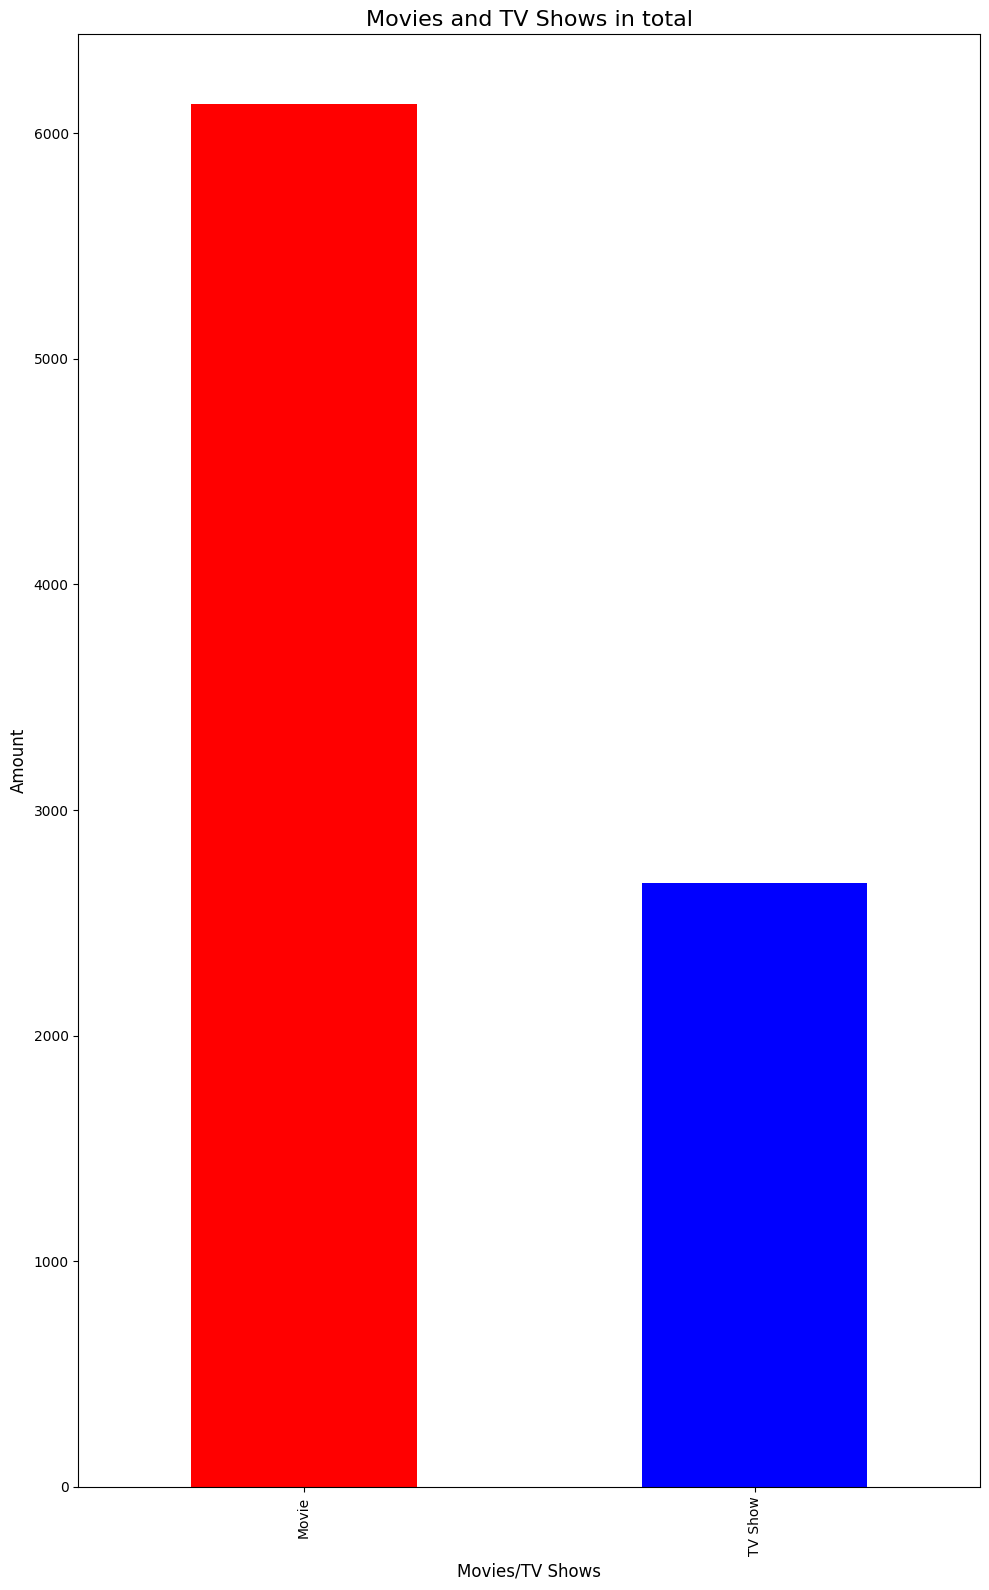

In [116]:
flixdetail = counts
colors = ['red', 'blue']

#Create a bar chart for movies and TV shows.
plt.figure(figsize=(10, 16))
flixdetail.plot(kind='bar', color=colors)
plt.title("Movies and TV Shows in total", fontsize=16)
plt.xlabel("Movies/TV Shows", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.tight_layout()
plt.show()

### How many movies there are in each genre(TOP 5.)

In [102]:
pd.set_option('display.max_rows', None)

# First filter dataset to include only movies.
movies_df = df2[df2['type']== 'Movie']

# Then do the same for TV Shows.
tv_df = df2[df2['type']== 'TV Show']

# Group then by genre and count the number of movies in each genre.
genre_count_movies = movies_df['genre'].value_counts().reset_index()
genre_count_movies.columns = ['genre','amount']

# Then same for TV Shows
genre_count_tv = tv_df['genre'].value_counts().reset_index()
genre_count_tv.columns = ['genre','amount']

genre_count_movies.set_index('genre', inplace=True)


genre_count_movies.head()

,amount
genre,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252


### How many tv shows there are in each genre(TOP 5.)

In [103]:
genre_count_tv.set_index('genre', inplace=True)
genre_count_tv.head()

,amount
genre,
Kids' TV,220
"International TV Shows, TV Dramas",121
"Crime TV Shows, International TV Shows, TV Dramas",110
"Kids' TV, TV Comedies",99
Reality TV,95


### Visualization of total movies in each genre and total TV Shows in each genre. (top5)

<Figure size 1000x1600 with 0 Axes>

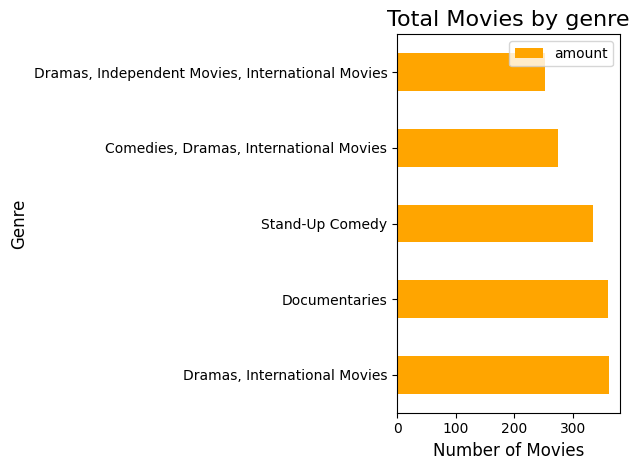

<Figure size 1000x1600 with 0 Axes>

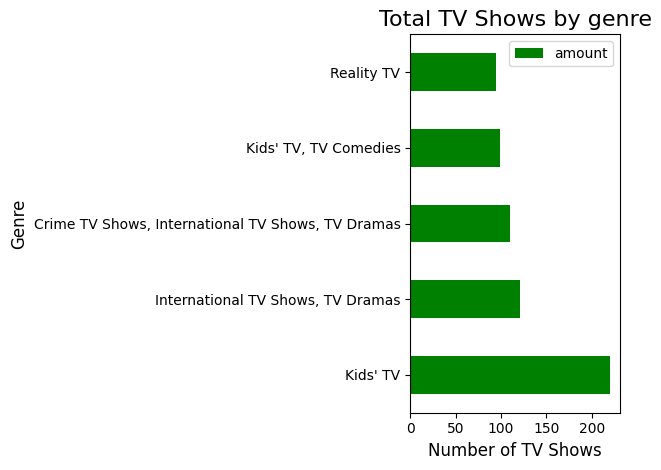

In [108]:
movies_d = genre_count_movies.head()
tv_d = genre_count_tv.head()


#create a horizontal bar chart for movies.
plt.figure(figsize=(10, 16))
movies_d.plot(kind='barh', color='orange')
plt.title("Total Movies by genre", fontsize=16)
plt.xlabel("Number of Movies", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()
plt.show()


#create a horizontal bar chart for TV.
plt.figure(figsize=(10, 16))
tv_d.plot(kind='barh', color='green')
plt.title("Total TV Shows by genre", fontsize=16)
plt.xlabel("Number of TV Shows", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.tight_layout()
plt.show()









### Total movies by Country (top 5)  

In [ ]:
# First filter the dataset to include only movies.
movies_country = df2[df2['type']== 'Movie']

#remove the unknown values from country column.
movies_country = df2[df2['country'] != 'unknown']

#Then count the number of movies in each country.
country_count = movies_country['country'].value_counts().reset_index()

#Rename columns for better readability.
country_count.columns = ['Country', 'Number of Movies']

country_count.set_index('Country', inplace=True)

country_count.head()

,Number of Movies
Country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199


### Visualization of total movies by country.

<Figure size 1000x1600 with 0 Axes>

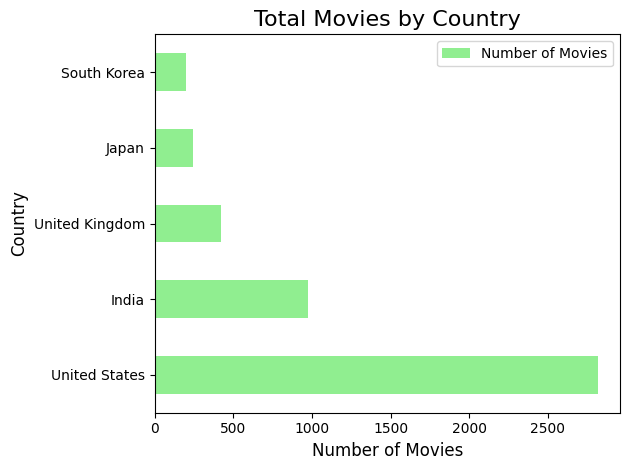

In [ ]:
details = country_count.head()

#create a horizontal bar chart 
plt.figure(figsize=(10, 16))
details.plot(kind='barh', color='lightgreen')
plt.title("Total Movies by Country", fontsize=16)
plt.xlabel("Number of Movies", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.show()